In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
import tensorflow as tf
print("GPUs disponibles:")
print(tf.config.list_physical_devices('GPU'))

GPUs disponibles:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Definir la ruta de la carpeta que contiene las imágenes PNG
ruta_carpeta = 'C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\BD\\imagenesMak1'

# Obtener la lista de nombres de archivos de imágenes
archivos_imagenes = os.listdir(ruta_carpeta)

# Cargar las imágenes y convertirlas en matrices numpy
imagenes = []
nombre = []

for archivo in archivos_imagenes:
    ruta_imagen = os.path.join(ruta_carpeta, archivo)
    imagen = load_img(ruta_imagen, color_mode='grayscale', target_size=(128, 128))  # Convertir a escala de grises y redimensionar
    imagen = img_to_array(imagen) / 255.0  # Normalizar los valores de píxeles entre 0 y 1
    imagenes.append(imagen)
    nombre.append(archivo)

    
    
# Convertir la lista de imágenes a un arreglo numpy
imagenes = np.array(imagenes)


In [9]:
imagenes.shape

(1254, 128, 128, 1)

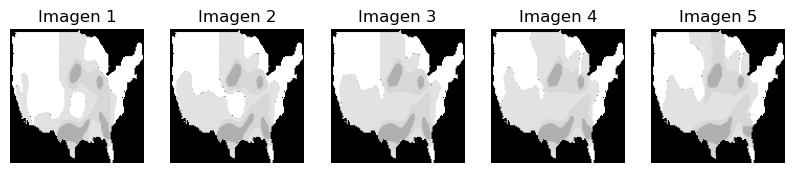

Array numpy 1:
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
Array numpy 2:
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
Array numpy 3:
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
Array numpy 4:
[[[0.]
  [0.]
  [0.]
 

In [10]:
# Imprimir las primeras 5 imágenes
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(imagenes[i].reshape(128, 128), cmap='gray')
    plt.title(f'Imagen {i+1}')
    plt.axis('off')
plt.show()

# Imprimir los primeros 5 arrays numpy correspondientes
for i in range(5):
    print(f"Array numpy {i+1}:\n{imagenes[i]}")

In [11]:
print("GPUs disponibles:")
print(tf.config.list_physical_devices('GPU'))

GPUs disponibles:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
# Dividir el conjunto de datos en datos de entrenamiento y validación
X_train, X_val = train_test_split(imagenes, test_size=0.2, random_state=42)
Y_train, Y_val = train_test_split(nombre, test_size=0.2, random_state=42)

In [13]:

# Construir el modelo del autoencoder
input_img = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Crear el modelo del encoder
encoder = Model(input_img, encoded)

# Entrenar el modelo
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val, X_val))



Epoch 1/50
8/8 [==============================] - 2s 140ms/step - loss: 0.5896 - val_loss: 0.4809
Epoch 2/50
8/8 [==============================] - 1s 118ms/step - loss: 0.3988 - val_loss: 0.3155
Epoch 3/50
8/8 [==============================] - 1s 118ms/step - loss: 0.2641 - val_loss: 0.2199
Epoch 4/50
8/8 [==============================] - 1s 124ms/step - loss: 0.2107 - val_loss: 0.2044
Epoch 5/50
8/8 [==============================] - 1s 119ms/step - loss: 0.2014 - val_loss: 0.1976
Epoch 6/50
8/8 [==============================] - 1s 119ms/step - loss: 0.1954 - val_loss: 0.1951
Epoch 7/50
8/8 [==============================] - 1s 120ms/step - loss: 0.1975 - val_loss: 0.2114
Epoch 8/50
8/8 [==============================] - 1s 120ms/step - loss: 0.2034 - val_loss: 0.2057
Epoch 9/50
8/8 [==============================] - 1s 119ms/step - loss: 0.1959 - val_loss: 0.1922
Epoch 10/50
8/8 [==============================] - 1s 119ms/step - loss: 0.1915 - val_loss: 0.1903
Epoch 11/50
8/8 [==

In [ ]:
# Obtener las imágenes reconstruidas
imagenes_reconstruidas = autoencoder.predict(X_val)
imagenes_codificadas = encoder.predict(X_val)
todas_imagenes_reconstruida = autoencoder.predict(imagenes)
todas_imagenes_codificadas = autoencoder.predict(imagenes)

40/40 [==============================] - 0s 9ms/step


In [ ]:
print(todas_imagenes_reconstruida.shape)

(1254, 128, 128, 1)


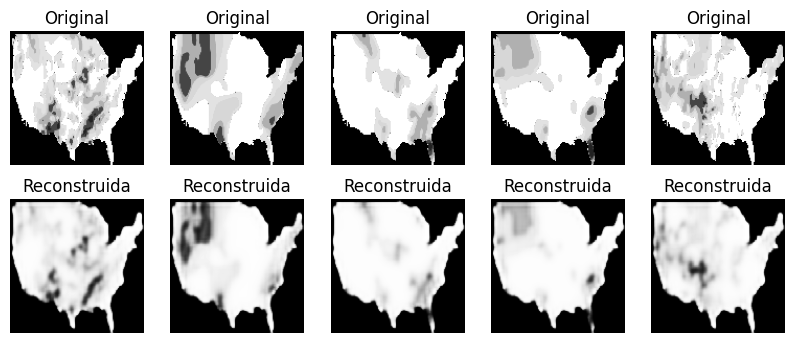

In [ ]:
# Visualizar algunas imágenes originales y reconstruidas
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i].reshape(128, 128), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imagenes_reconstruidas[i].reshape(128, 128), cmap='gray')
    plt.title('Reconstruida')
    plt.axis('off')
plt.show()

Imagen codificada 1: (32, 32, 64)
Imagen codificada 2: (32, 32, 64)
Imagen codificada 3: (32, 32, 64)
Imagen codificada 4: (32, 32, 64)
Imagen codificada 5: (32, 32, 64)


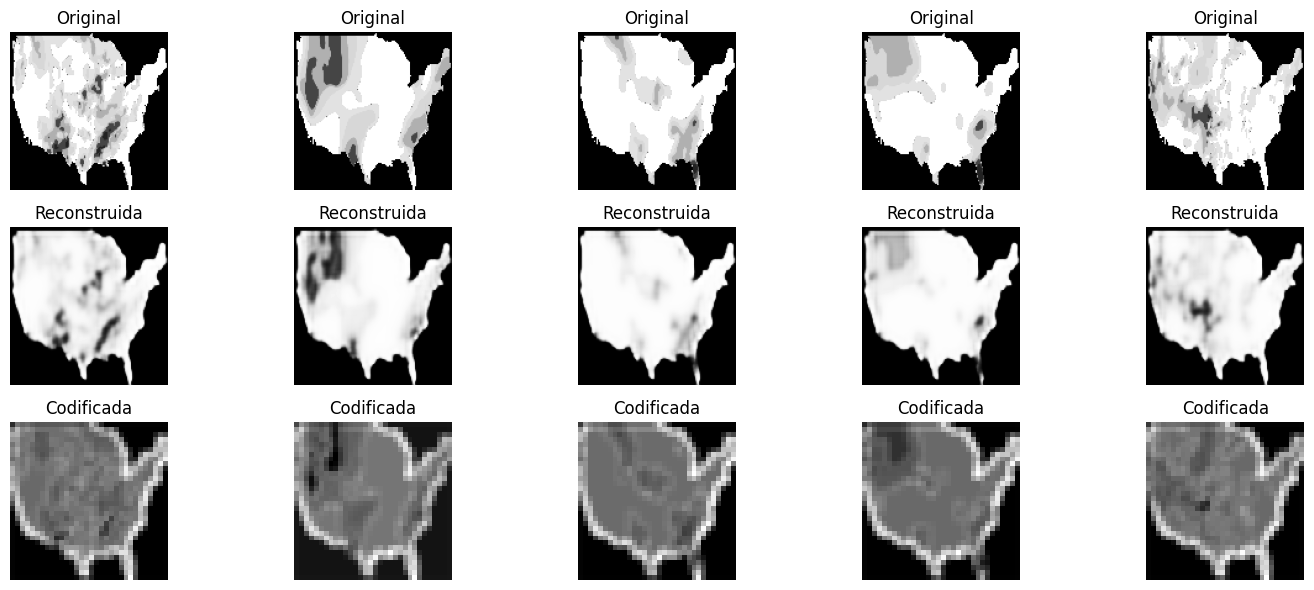

In [ ]:

# Visualizar algunas imágenes originales, reconstruidas y codificadas
n = 5
plt.figure(figsize=(15, 6))
for i in range(n):
    # Imagen original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_val[i].reshape(128, 128), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Imagen reconstruida
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(imagenes_reconstruidas[i].reshape(128, 128), cmap='gray')
    plt.title('Reconstruida')
    plt.axis('off')
  # Imagen codificada
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    forma_codificada = imagenes_codificadas[i].shape
    print(f"Imagen codificada {i+1}: {forma_codificada}")
    
    # Promediar los valores de los canales para obtener una imagen en escala de grises
    imagen_codificada_gris = np.mean(imagenes_codificadas[i], axis=-1)
    
    # Mostrar la imagen en escala de grises
    plt.imshow(imagen_codificada_gris, cmap='gray')
    plt.title('Codificada')
    plt.axis('off')

plt.tight_layout()
plt.show()

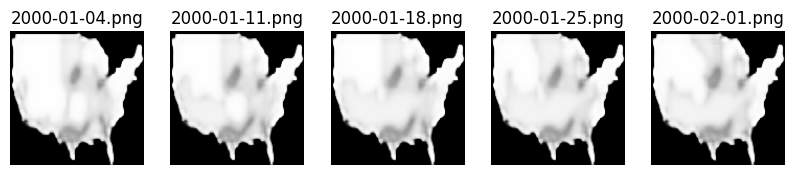

In [ ]:
# Visualizar algunas imágenes originales y reconstruidas
#todas_imagenes_reconstruida
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(todas_imagenes_reconstruida[i].reshape(128, 128), cmap='gray')
    plt.title(nombre[i])
    plt.axis('off')
    
plt.show()

In [ ]:
todas_imagenes_reconstruida.shape

(1254, 128, 128, 1)

Guarda las fotos

In [ ]:
import os
import numpy as np
import cv2

# Directorio donde se guardarán las imágenes reconstruidas
directorio_guardado = "C:\\Users\\Waldosir\\Documents\\2doCodigo\\RecPatron\\Tarea031724\\Fotos"

# Crear el directorio si no existe
if not os.path.exists(directorio_guardado):
    os.makedirs(directorio_guardado)

# Guardar todas las imágenes reconstruidas
for i, imagen_reconstruida in enumerate(todas_imagenes_reconstruida):
    nombre_archivo = os.path.join(directorio_guardado, f"imagen_reconstruida_{i}.png")
    # Escalar los valores de píxeles a 0-255 y convertir a tipo entero sin signo de 8 bits
    imagen_reconstruida = (imagen_reconstruida * 255).astype(np.uint8)
    # Eliminar la dimensión de canal (si es necesario)
    if imagen_reconstruida.shape[-1] == 1:
        imagen_reconstruida = imagen_reconstruida.squeeze(axis=-1)
    # Guardar la imagen usando OpenCV
    cv2.imwrite(nombre_archivo, imagen_reconstruida)

print("Todas las imágenes reconstruidas guardadas en el directorio:", directorio_guardado)


Todas las imágenes reconstruidas guardadas en el directorio: C:\Users\Waldosir\Documents\2doCodigo\RecPatron\Tarea031724\Fotos
